In [1]:
from src.utils.geo_utils import *
from src.utils.script import *
from src.utils.continents import *
from src.utils.who_data_handling import *
df = load_data()

#We will first do some analysis on our dataset

In [2]:
describe(df)

The 5 first rows of the data:
   BindingDB Reactant_set_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   

                                       Ligand SMILES  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...   
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...   
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...   
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...   

                                        Ligand InChI  \
0  InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...   
1  InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...   
2  InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...   
3  InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...   
4  InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...   

              Ligand InChI Key  BindingDB MonomerID  \
0  XGEGDSLAQZJGCW-HHGOQMMWSA-N               608

In [3]:
print(f'Number of ligands in the data: {len(ligands_counts(df))}')
print(f'Number of targets in the data: {len(target_counts(df))}')
print(f'Number of sources in the data: {len(target_source_counts(df))}')
print(f'Number of targets in the data that have a source: {len(targets_with_and_without_source(df)[0])}')
print(f"Number of targets in the data that don't have a source: {len(targets_with_and_without_source(df)[1])}")

Number of ligands in the data: 1287111
Number of targets in the data: 6736
Number of sources in the data: 330
Number of targets in the data that have a source: 3746
Number of targets in the data that don't have a source: 2990


In [4]:
print('Sources for the targets:')
for source in sorted(sources(df)) :
    print(source)

Sources for the targets:
Abelson murine leukemia virus
Acinetobacter baumannii
Acinetobacter genomosp. 3
Actinomadura sp. (strain R39)
Aedes aegypti
Aeromonas allosaccharophila
Aeromonas hydrophila
Agaricus bisporus
Agrobacterium sp. ZY-2006e
Alcaligenes sp. (strain DSM 11172)
Alicyclobacillus acidocaldarius
Amphiuma tridactylum
Anura
Apis mellifera
Aquifex aeolicus
Arabidopsis thaliana
Aspergillus aculeatus
Aspergillus fumigatiaffinis
Aspergillus niger
Aspergillus oryzae
Asterina pectinifera
Avian erythroblastosis virus (strain ES4)
Avian myeloblastosis virus
Avian sarcoma virus
Bacillus amyloliquefaciens
Bacillus anthracis
Bacillus cereus
Bacillus cereus (strain ATCC 14579 / DSM 31)
Bacillus clausii
Bacillus lentus
Bacillus licheniformis
Bacillus pasteurii
Bacillus sporothermodurans
Bacillus subtilis
Bacillus thermoproteolyticus
Bacteroides thetaiotaomicron
Bison bison
Bombyx mori
Borrelia burgdorferi
Bos taurus
Bovine viral diarrhea virus (strain CP7)
Brachyspira pilosicoli
Brassica

### Institution basic information

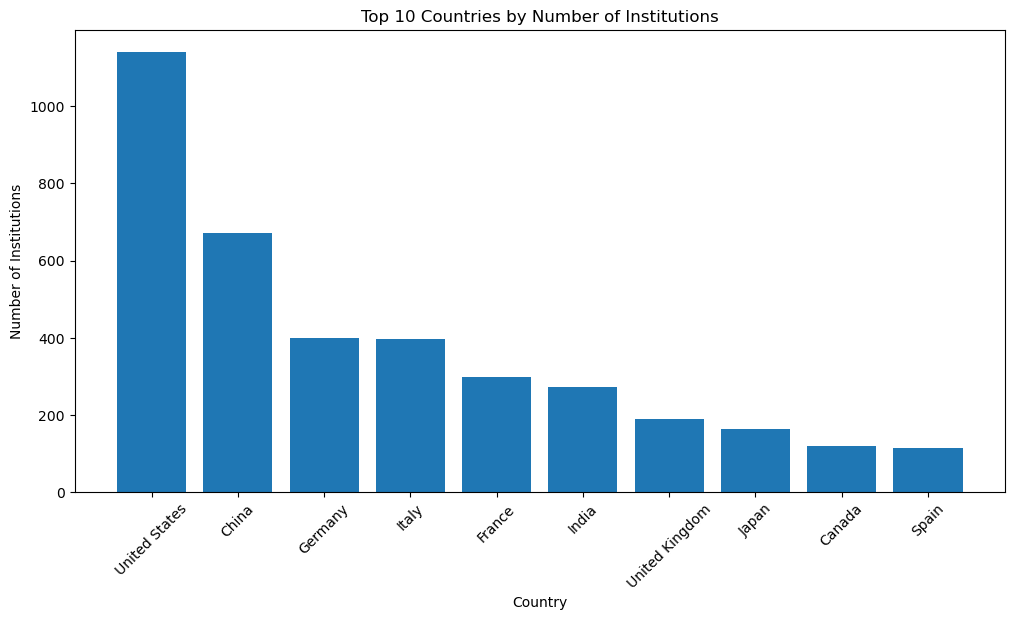

In [5]:
geodata = get_institution_locations(df) 
countries_with_most_institutions(geodata)

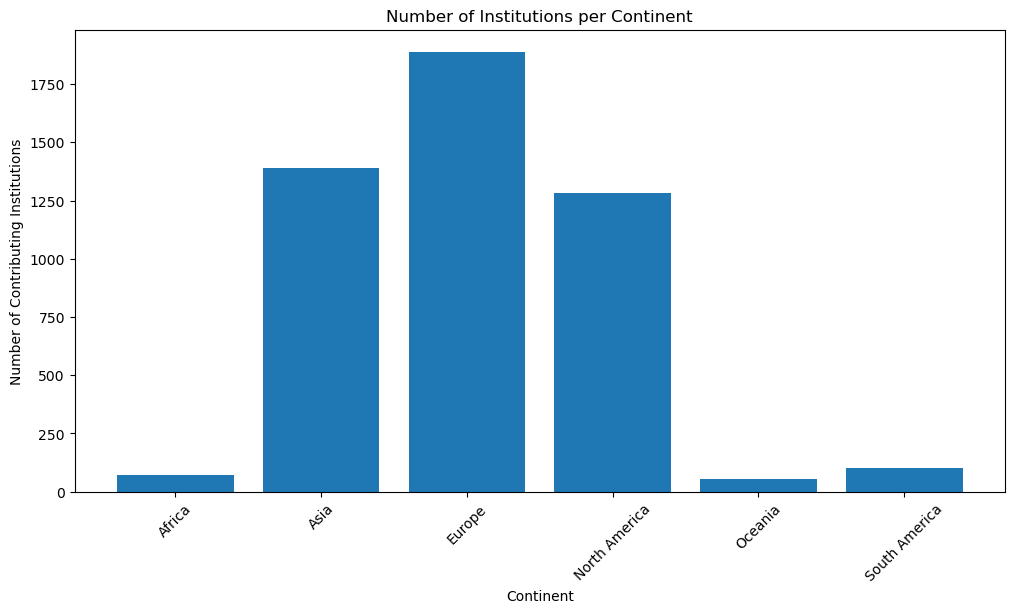

In [6]:


institutions_per_continent(geodata)

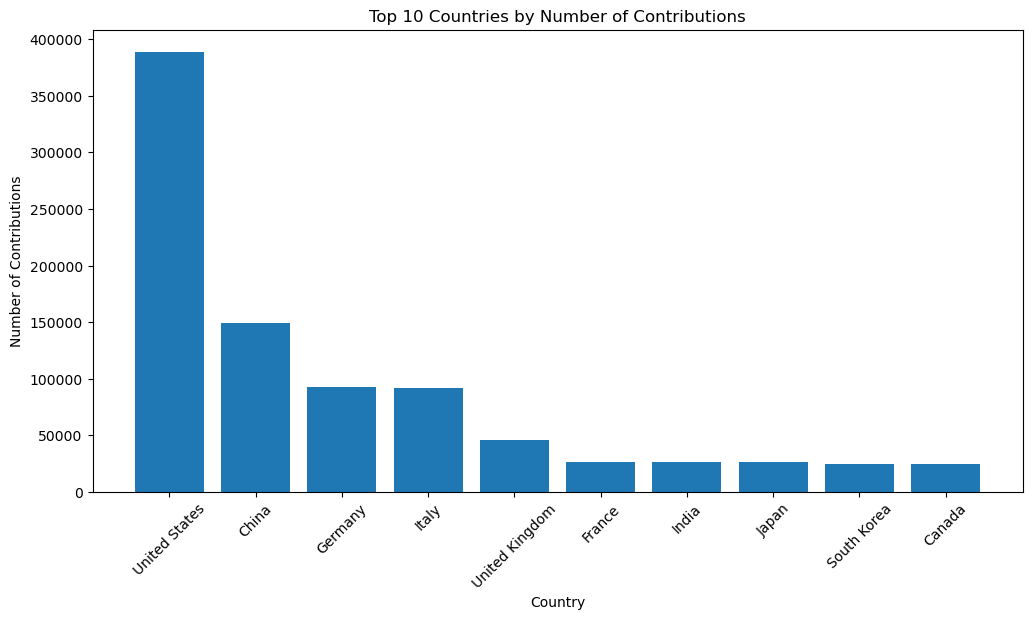

In [7]:

top_countries_bar_chart(geodata)

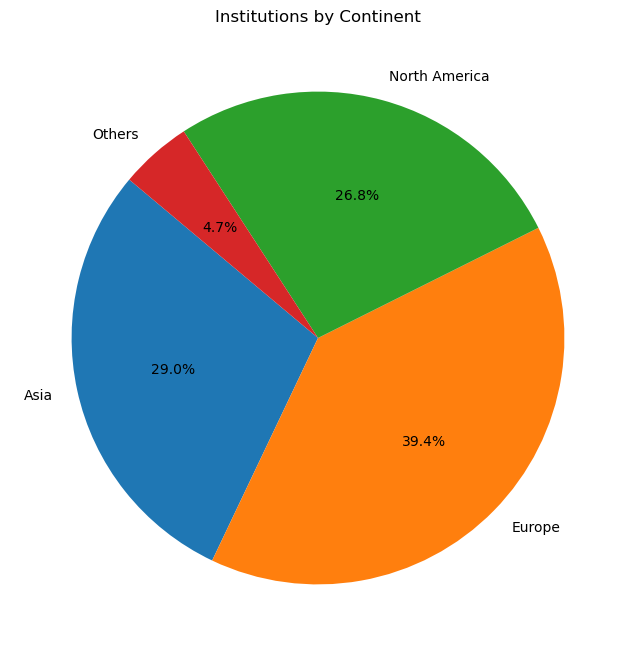

In [8]:
continents_pie_chart(geodata)

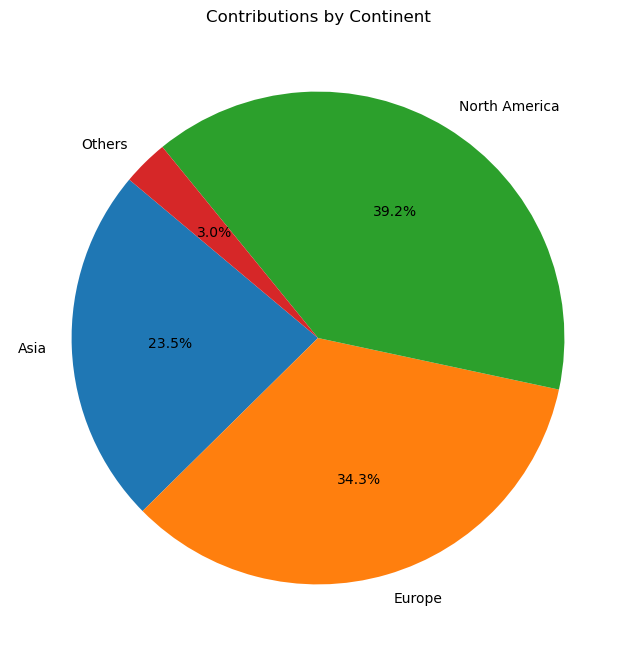

In [9]:

contribs_by_continents_pie(geodata)

### WHO DB diseases insights

To find data on diseases researched in experiments in the BindingDB dataset, we first made a list of all unique words used for target sources in BindingDB. Then we searched WHO's databases for these same words. After doing this we identified 7 diseases for which BindingDB has exepriment data for and WHO has data on their prevalences worldwide. We then used the prevalences data to calculate the number of people affected by each disease both in each country and in each region as defined by WHO. The heatmap shows the relative number of people affected by each disease in each region.

  Cases  Plasmodium Falciparum  Human Immunodeficiency Virus  Poliovirus  \
0   AFR               2.235860                      2.230921    0.176732   
1   AMR              -0.455348                     -0.303700   -1.024630   
2   EMR              -0.419126                     -0.499869    0.881025   
3   EUR              -0.460097                     -0.452878   -1.133760   
4  SEAR              -0.444670                     -0.464986    1.611350   
5   WPR              -0.456619                     -0.509489   -0.510717   

   Plasmodium vivax  Mycobacterium tuberculosis  Escherichia coli  Hepatitis C  
0          1.137665                    2.227499          0.365517     1.179250  
1          0.262944                   -0.562729         -1.035877    -0.409647  
2          1.236407                   -0.289455          1.865044     0.248546  
3         -1.369274                   -0.449832          0.338614     1.260560  
4         -0.170526                   -0.522715         -0.655

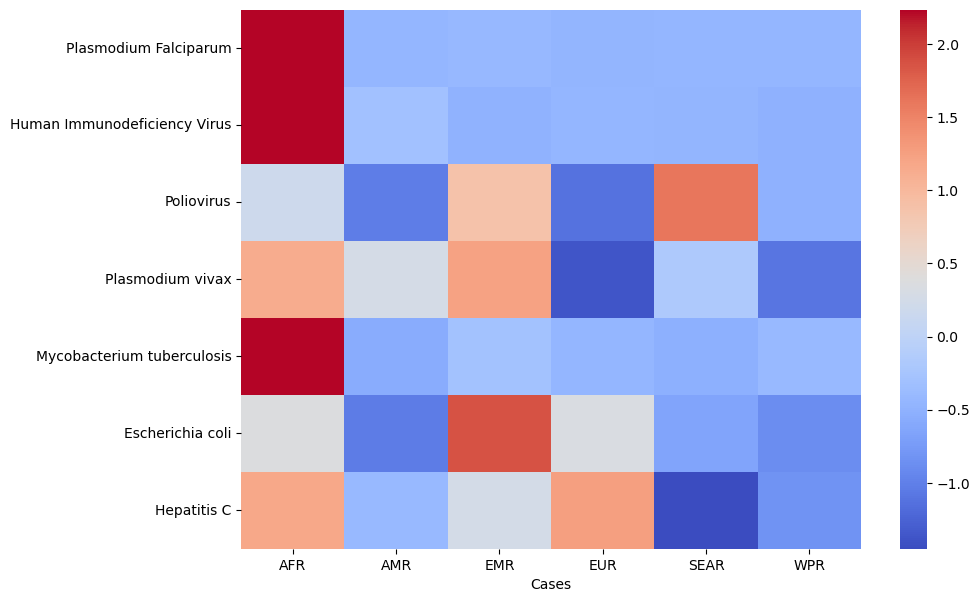

In [10]:
plot_who_heatmap()

### Target based insights

In [11]:
source_targets_map = targets_for_sources(df)

In [12]:
targets_with_multiple_sources(targets_with_and_without_source(df)[0],source_targets_map)

There are targets with multiple sources


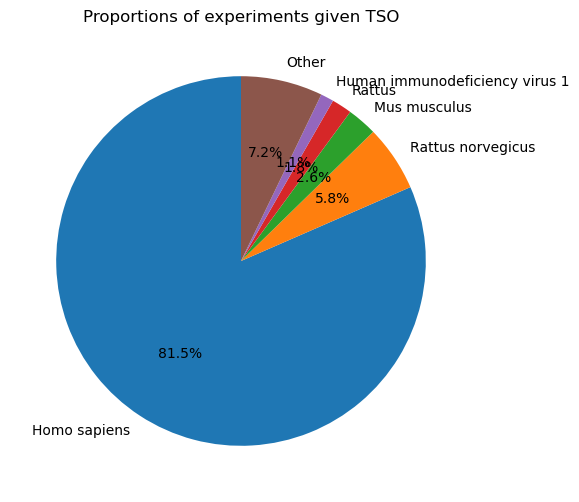

In [13]:
plot_proportions_of_experiments_given_TSO(df)

In [14]:
top_twenty_ligands_with_most_experiments = ligands_counts(df).index.tolist()[:20]
top_twenty_ligands_with_most_experiments_dict = {f'Lingand{i+1}': ligand for i, ligand in enumerate(top_twenty_ligands_with_most_experiments)}

In [15]:
top_twenty_targets_with_most_experiments = target_counts(df).index.tolist()[:20]

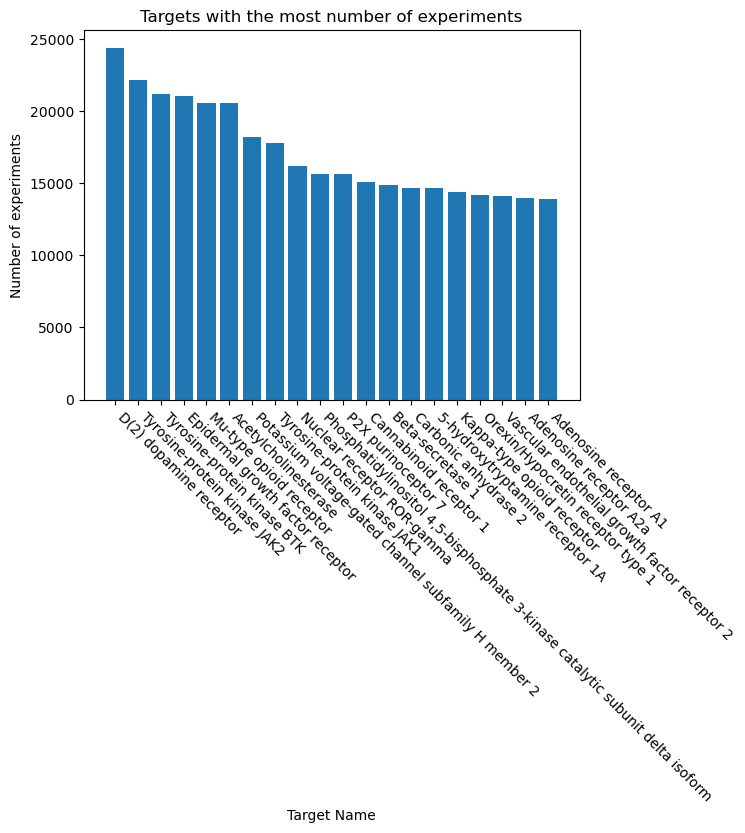

In [16]:
plt.bar(top_twenty_targets_with_most_experiments, target_counts(df)[:20])
plt.xticks(rotation=-45,ha='left')
plt.xlabel('Target Name')
plt.ylabel('Number of experiments')
plt.title('Targets with the most number of experiments')
plt.show()

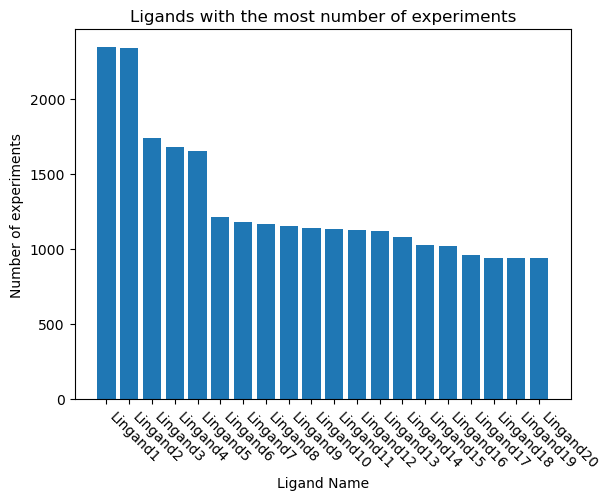

In [17]:
plt.bar(top_twenty_ligands_with_most_experiments_dict.keys(), ligands_counts(df)[:20])
plt.xticks(rotation=-45,ha='left')
plt.xlabel('Ligand Name')
plt.ylabel('Number of experiments')
plt.title('Ligands with the most number of experiments')
plt.show()

We should remove the lines for which we do not have constants that tell us the strength of the binding affinity.

In [18]:
len(df[df["Ki (nM)"].isnull() & df["IC50 (nM)"].isnull() & df["Kd (nM)"].isnull() & df["EC50 (nM)"].isnull() & df["kon (M-1-s-1)"].isnull() & df["koff (s-1)"].isnull() & df["pH"].isnull()])
df = df[~(df["Ki (nM)"].isnull() & df["IC50 (nM)"].isnull() & df["Kd (nM)"].isnull() & df["EC50 (nM)"].isnull() & df["kon (M-1-s-1)"].isnull() & df["koff (s-1)"].isnull() & df["pH"].isnull())]


We chose to focus on these 7 major diseases : 

- HIV
- Tuberculosis
- Hepatitis C
- Plasmodium falciparum
- Poliovirus type 1
- Escherichia coli
- Plasmodium vivax


For each disease, we look at how much research was done on it

In [19]:
HIV_sources = [source for source in sources(df) if "Human immunodeficiency" in source or "Human Immunodeficiency" in source or "human immunodeficiency" in source]
print(HIV_sources)

['Human immunodeficiency virus 1', 'Human immunodeficiency virus', 'Human immunodeficiency virus type 1 group M subtype B (isolate BRU/LAI)', 'Human immunodeficiency virus type 1 group M subtype B (isolate YU-2)', 'Human immunodeficiency virus type 1 group M subtype B (isolate HXB2)', 'Human immunodeficiency virus 2', 'Human immunodeficiency virus type 1 group M subtype B (isolate PCV12)', 'Human immunodeficiency virus type 1 group M subtype B (isolate MN)']


In [20]:
Tuberculosis_sources = [source for source in sources(df) if "tuberculosis" in source or "Tuberculosis" in source]
print(Tuberculosis_sources)

['Mycobacterium tuberculosis', 'Mycobacterium tuberculosis H37Rv']


In [21]:
Hepatitis_sources = [source for source in sources(df) if "hepatitis C" in source or "Hepatitis C" in source]
print(Hepatitis_sources)

['Hepatitis C virus', 'Hepatitis C virus genotype 1a (isolate H)', 'Hepatitis C virus genotype 1b (isolate BK)', 'Hepatitis C virus genotype 3a (isolate NZL1)', 'Hepatitis C virus genotype 2b (isolate HC-J8)', 'Hepatitis C virus genotype 1b (isolate Taiwan)', 'Hepatitis C virus genotype 2', 'Hepatitis C virus genotype 4a (isolate ED43)', 'Hepatitis C virus genotype 6a (isolate EUHK2)']


In [22]:
Plasmodium_falciparum_sources = [source for source in sources(df) if "Plasmodium falciparum" in source or "Plasmodium falciparum" in source]
print(Plasmodium_falciparum_sources)

['Plasmodium falciparum', 'Plasmodium falciparum (isolate 3D7)', 'Plasmodium falciparum (isolate K1 / Thailand)', 'Plasmodium falciparum (isolate FcB1 / Columbia)']


In [23]:
Poliovirus_sources = [source for source in sources(df) if "Poliovirus" in source or "poliovirus" in source]
print(Poliovirus_sources)

['Poliovirus type 1 (strain Mahoney)']


In [24]:
Plasmodium_vivax_sources = [source for source in sources(df) if "Plasmodium vivax" in source or "plasmodium vivax" in source]
print(Plasmodium_vivax_sources)

['Plasmodium vivax']


In [25]:
Escherichia_coli_sources = [source for source in sources(df) if "Escherichia coli" in source or "escherichia coli" in source]
print(Escherichia_coli_sources)

['Escherichia coli', 'Escherichia coli str. K-12 substr. MG1655', 'Escherichia coli (strain UTI89 / UPEC)', 'Escherichia coli (strain K12)', 'Escherichia coli O157:H7', 'Escherichia coli O6']


Some analysis on the reasearch done for these sources

In [26]:
import pickle
full_locations = pickle.load(open('src/data/full_institution_locations.pkl', 'rb'))

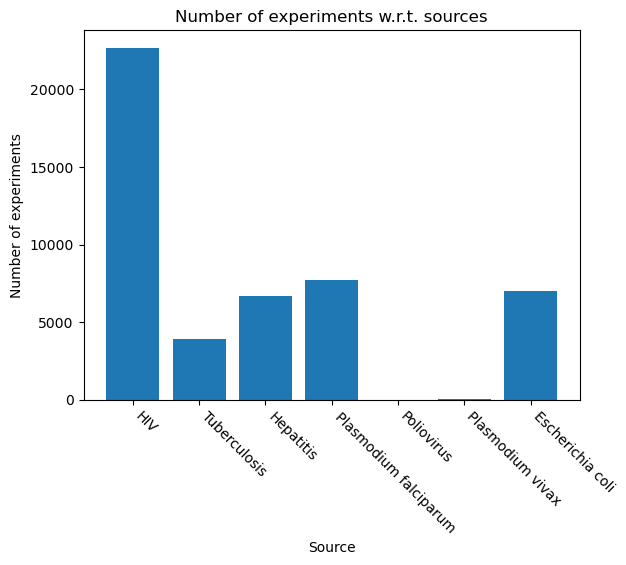

In [27]:
plt.bar(['HIV','Tuberculosis','Hepatitis','Plasmodium falciparum','Poliovirus','Plasmodium vivax','Escherichia coli'],

        [len(df[df["Target Source Organism According to Curator or DataSource"].isin(HIV_sources)]),
         len(df[df["Target Source Organism According to Curator or DataSource"].isin(Tuberculosis_sources)]),
         len(df[df["Target Source Organism According to Curator or DataSource"].isin(Hepatitis_sources)]),
         len(df[df["Target Source Organism According to Curator or DataSource"].isin(Plasmodium_falciparum_sources)]),
         len(df[df["Target Source Organism According to Curator or DataSource"].isin(Poliovirus_sources)]),
         len(df[df["Target Source Organism According to Curator or DataSource"].isin(Plasmodium_vivax_sources)]),
        len(df[df["Target Source Organism According to Curator or DataSource"].isin(Escherichia_coli_sources)])]
)
plt.xticks(rotation=-45,ha='left')
plt.xlabel('Source')
plt.ylabel('Number of experiments')
plt.title('Number of experiments w.r.t. sources')

plt.show()

In [28]:
dx = df[['Institution', 'Target Source Organism According to Curator or DataSource']]
countries ={}
import src.utils.continents as continents
for k,v in full_locations.items():
        components = v[0]['address_components']
        country = next((component['long_name'] for component in components if 'country' in component['types']), 'Unknown')
        countries[k] = country
        
dx['Country'] = dx['Institution'].map(countries)
dx['Continent'] = dx['Country'].map(continents.get_continent)
dx = dx[dx['Country'] != 'Unknown']
dx = dx[dx['Continent'] != 'Unknown']

/tmp/ipykernel_5528/1122659020.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['Country'] = dx['Institution'].map(countries)
/tmp/ipykernel_5528/1122659020.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['Continent'] = dx['Country'].map(continents.get_continent)


In the following, we analyze the research trend on major diseases by comparing the number of experiments conducted across different countries and continents. For each disease, we visualize the leading countries/continents based on the amount of research conducted.

/home/lucas/EPFL/ada/proj/src/utils/script.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45, ha='left')
/home/lucas/EPFL/ada/proj/src/utils/script.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45, ha='left')


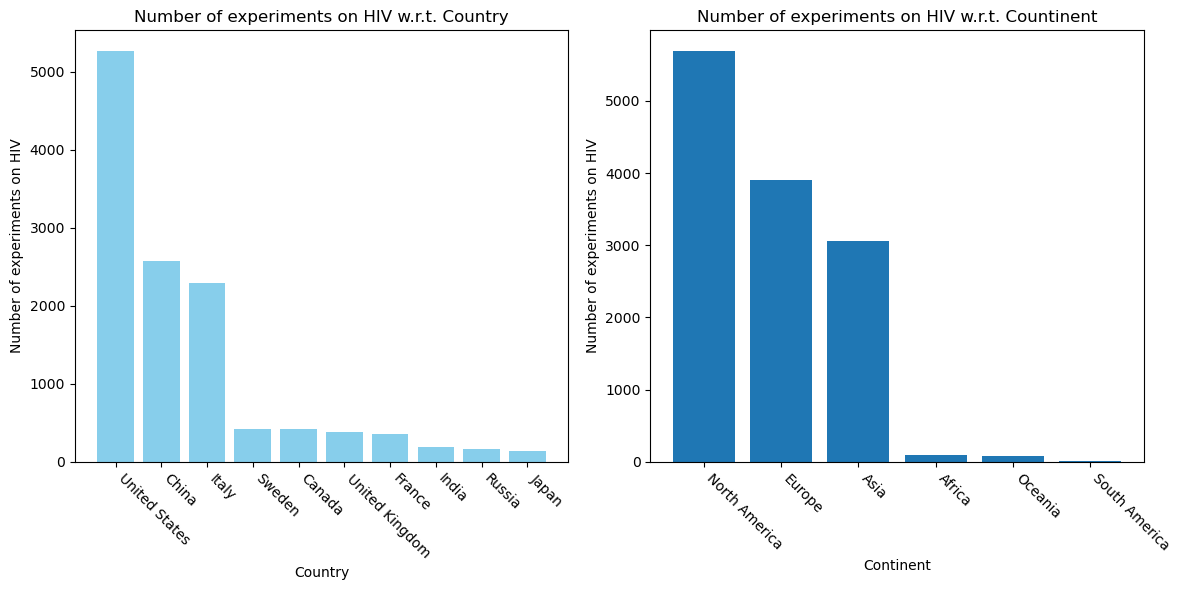

In [30]:
#HIV
plot_disease('HIV',dx, HIV_sources)


/home/lucas/EPFL/ada/proj/src/utils/script.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45, ha='left')
/home/lucas/EPFL/ada/proj/src/utils/script.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45, ha='left')


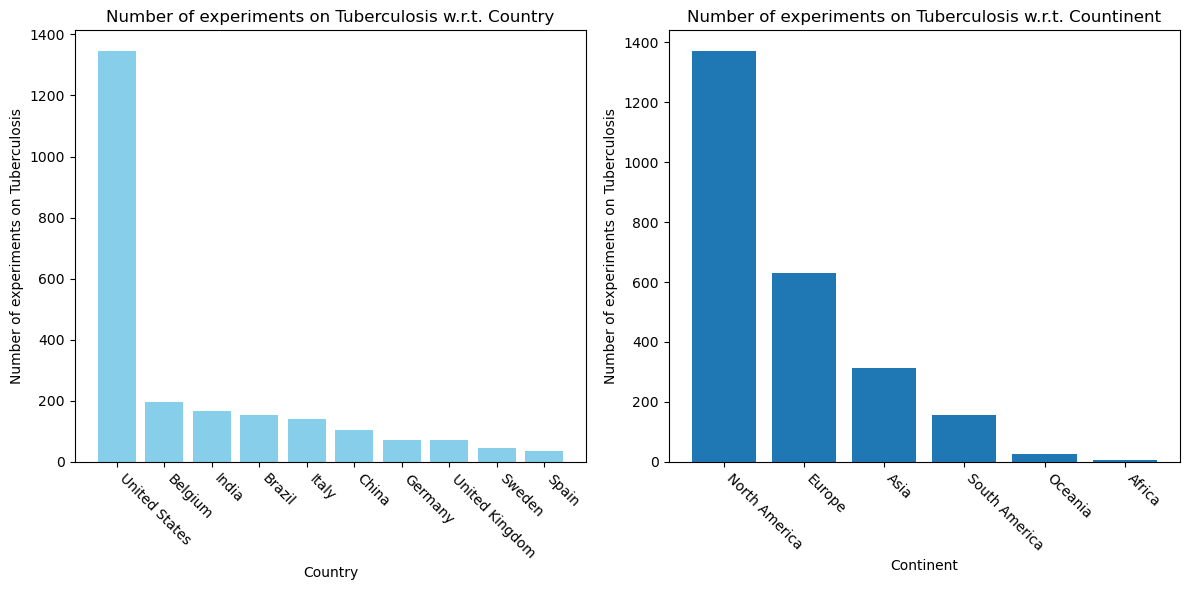

In [31]:
#Tuberculosis
plot_disease('Tuberculosis',dx, Tuberculosis_sources)

/home/lucas/EPFL/ada/proj/src/utils/script.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45, ha='left')
/home/lucas/EPFL/ada/proj/src/utils/script.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45, ha='left')


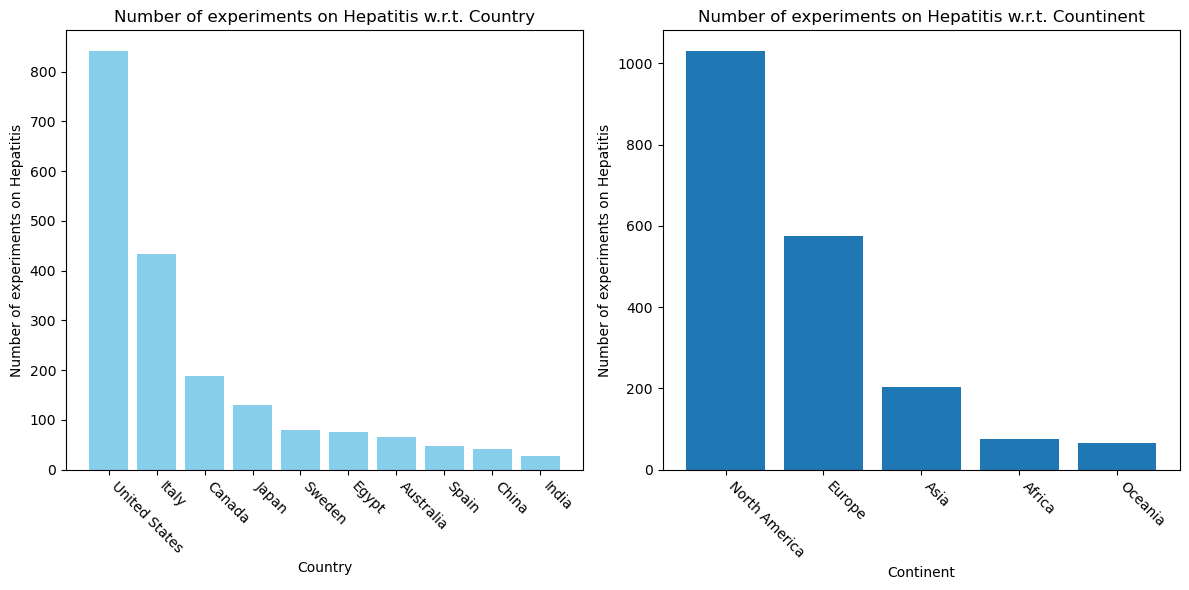

In [32]:
#Hepatitis
plot_disease('Hepatitis',dx, Hepatitis_sources)

/home/lucas/EPFL/ada/proj/src/utils/script.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45, ha='left')
/home/lucas/EPFL/ada/proj/src/utils/script.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45, ha='left')


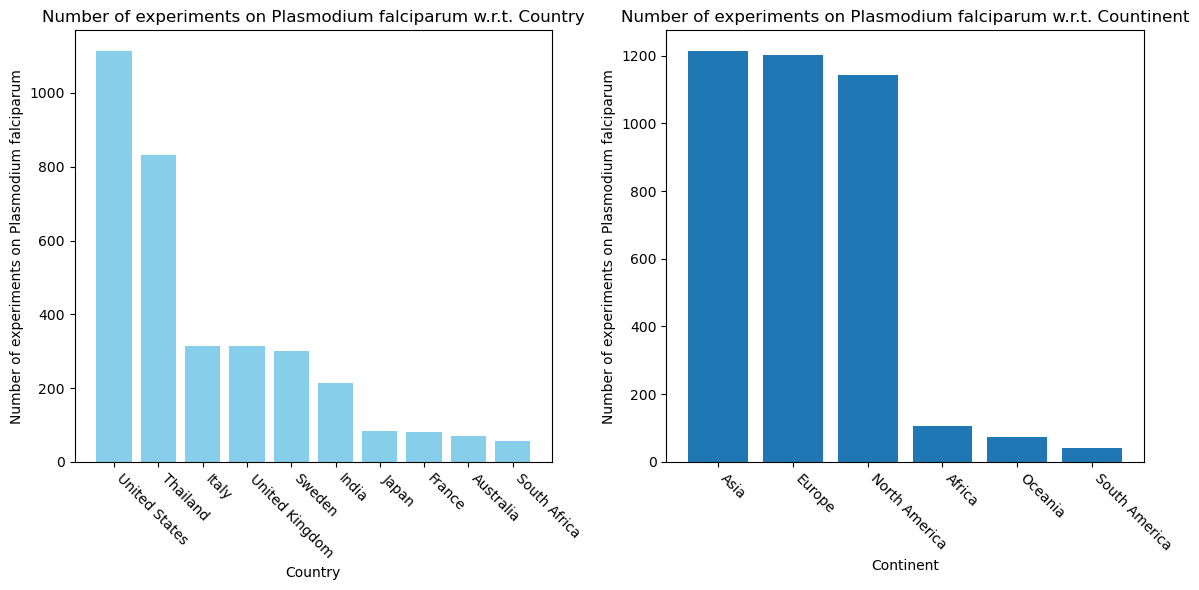

In [33]:
#Plasmodium_falciparum
plot_disease("Plasmodium falciparum",dx, Plasmodium_falciparum_sources)

/home/lucas/EPFL/ada/proj/src/utils/script.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45, ha='left')
/home/lucas/EPFL/ada/proj/src/utils/script.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45, ha='left')


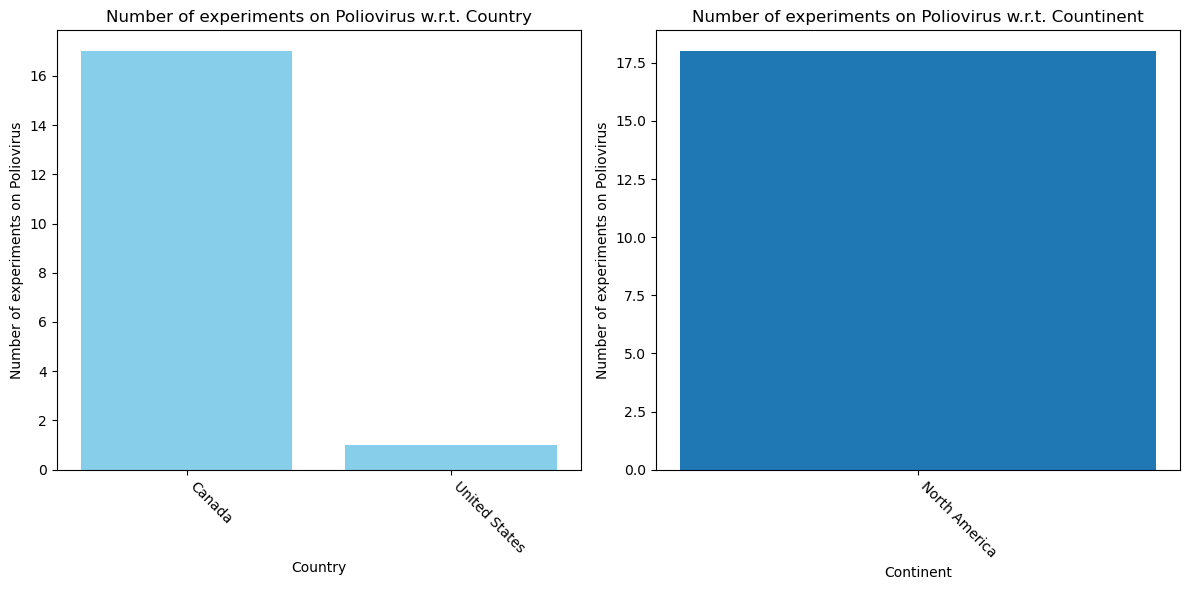

In [34]:
#Poliovirus
plot_disease("Poliovirus",dx, Poliovirus_sources)

/home/lucas/EPFL/ada/proj/src/utils/script.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45, ha='left')
/home/lucas/EPFL/ada/proj/src/utils/script.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45, ha='left')


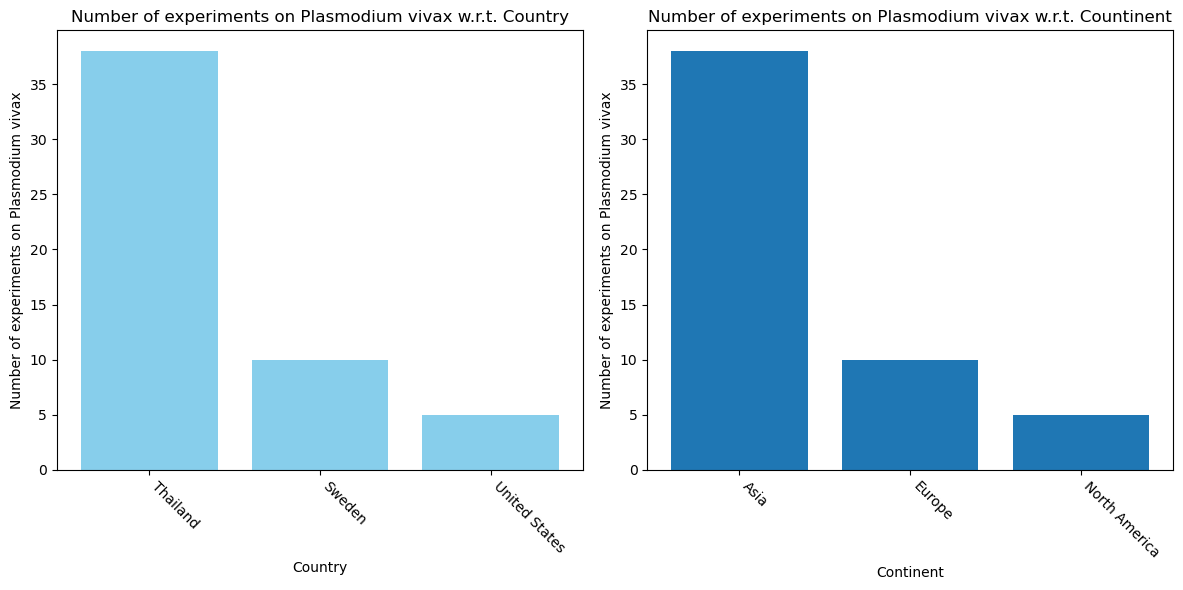

In [35]:
#Plasmodium_vivax
plot_disease("Plasmodium vivax",dx, Plasmodium_vivax_sources)

/home/lucas/EPFL/ada/proj/src/utils/script.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45, ha='left')
/home/lucas/EPFL/ada/proj/src/utils/script.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45, ha='left')


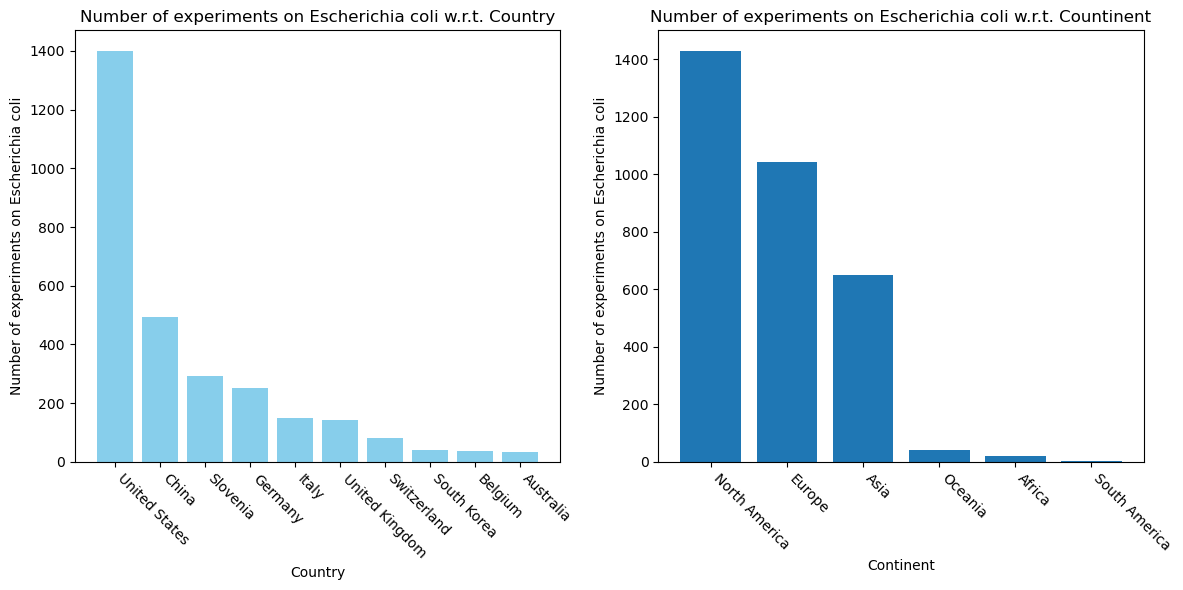

In [36]:
#Escherichia_coli
plot_disease("Escherichia coli",dx, Escherichia_coli_sources)

### Likeness analysis

In [ ]:
from src.utils.likeness import *
likable_drugs = df.loc[:, ['BindingDB Reactant_set_id', 'Ligand SMILES', 'BindingDB Ligand Name', 'Target Name']]

To evaluate whether the drug is 'likable' or not we will use three main criteria: Lipinski's Rule of Five, QED score and Verber criteria. 

##### **Lipinski's Rule of Five** 

Lipinski's Rule is a set of guidelines for assessing the potential oral bioavailability of a molecule based on its physicochemical properties According to these rules, a molecule is considered drug-like if it meets the following criteria:

- Molecular weight (MW) < 500 g/mol
- Log P (octanol-water partition coefficient) < 5
- Number of hydrogen bond donors ≤ 5
- Number of hydrogen bond acceptors ≤ 10

##### **Quantitative Estimate of Drug-likeness (QED)**

The QED score is a quantitative measure of drug-likeness that combines multiple physicochemical properties into a single score ranging from 0 to 1. Higher QED scores indicate greater drug-likeness. The properties considered in QED include:

- Molecular weight (MW)
- Log P (octanol-water partition coefficient)
- Number of hydrogen bond donors
- Number of hydrogen bond acceptors
- Rotatable bonds
- Polar surface area (PSA)

##### **Veber Criteria**

Veber's Rule is another guideline for evaluating the oral bioavailability of molecules, emphasizing flexibility and surface area. According to Veber criteria, a molecule is considered drug-like if it meets the following conditions:

- Rotatable bonds: ≤ 10
- Polar Surface Area (PSA): ≤ 140 Å²

likable_drugs = calculate_drug_properties(likable_drugs)
likable_drugs.head()

In [ ]:
nan_qed_smiles = likable_drugs[likable_drugs["QED Score"].isna()]["Ligand SMILES"]

print("SMILES strings with NaN QED Score:")
print(nan_qed_smiles)

We have identified over 3000 NaN QED scores in our dataset. A potential reason for this could be the presence of invalid SMILES strings, which may also be causing issues in extracting drug properties for these observations. Let’s investigate this further.

In [37]:
likable_drugs.dropna(inplace=True)
likable_drugs.isna().sum()

NameError: name 'likable_drugs' is not defined

In [ ]:
qed_values = likable_drugs.dropna(subset="QED Score")["QED Score"].values
q75, q90, q95 = np.percentile(qed_values, [75, 90, 95])

In [ ]:
count_q75 = len(likable_drugs[(likable_drugs["Lipinski Pass"] == True) & 
                              (likable_drugs["Veber Pass"] == True) & 
                              (likable_drugs["QED Score"] >= q75)])

count_q90 = len(likable_drugs[(likable_drugs["Lipinski Pass"] == True) & 
                              (likable_drugs["Veber Pass"] == True) & 
                              (likable_drugs["QED Score"] >= q90)])

count_q95 = len(likable_drugs[(likable_drugs["Lipinski Pass"] == True) & 
                              (likable_drugs["Veber Pass"] == True) & 
                              (likable_drugs["QED Score"] >= q95)])

print(f"Number of observations over 75th percentile: {count_q75} out of {len(qed_values)}")
print(f"Number of observations over 90th percentile: {count_q90} out of {len(qed_values)}")
print(f"Number of observations over 95th percentile: {count_q95} out of {len(qed_values)}")

Number of observations over 75th percentile: 711735 out of 2910002
Number of observations over 90th percentile: 289274 out of 2910002
Number of observations over 95th percentile: 145396 out of 2910002


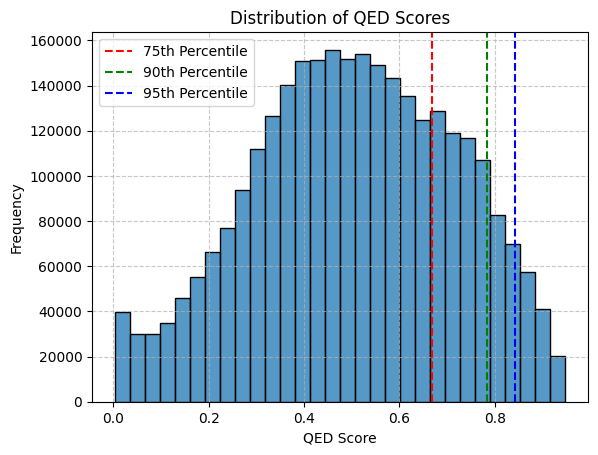

In [ ]:
sns.histplot(qed_values, bins=30)
plt.axvline(q75, color='red', linestyle='--', label='75th Percentile')
plt.axvline(q90, color='green', linestyle='--', label='90th Percentile')
plt.axvline(q95, color='blue', linestyle='--', label='95th Percentile')
plt.title("Distribution of QED Scores")
plt.xlabel("QED Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

The histogram shows that most compounds have QED scores between 0.4 and 0.8, with a peak around 0.6, indicating moderate drug-likeness for the majority. Only the top 25% have scores above 0.668, the top 10% above 0.785, and the top 5% exceed 0.842. Compounds above 0.7 are generally considered highly drug-like and may be prioritized for further study.

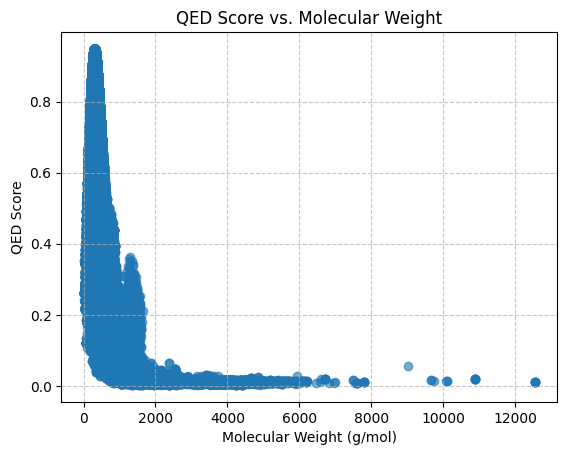

In [ ]:
molecular_weights = likable_drugs["Molecular Weight"].values

plt.scatter(molecular_weights, qed_values, alpha=0.6)
plt.title("QED Score vs. Molecular Weight")
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("QED Score")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

We observe that compounds with lower molecular weights tend to have higher QED scores, with scores dropping sharply as molecular weight increases. Compounds with molecular weights above 1,000 g/mol generally have very low QED scores, suggesting that higher molecular weight compounds are less drug-like. 

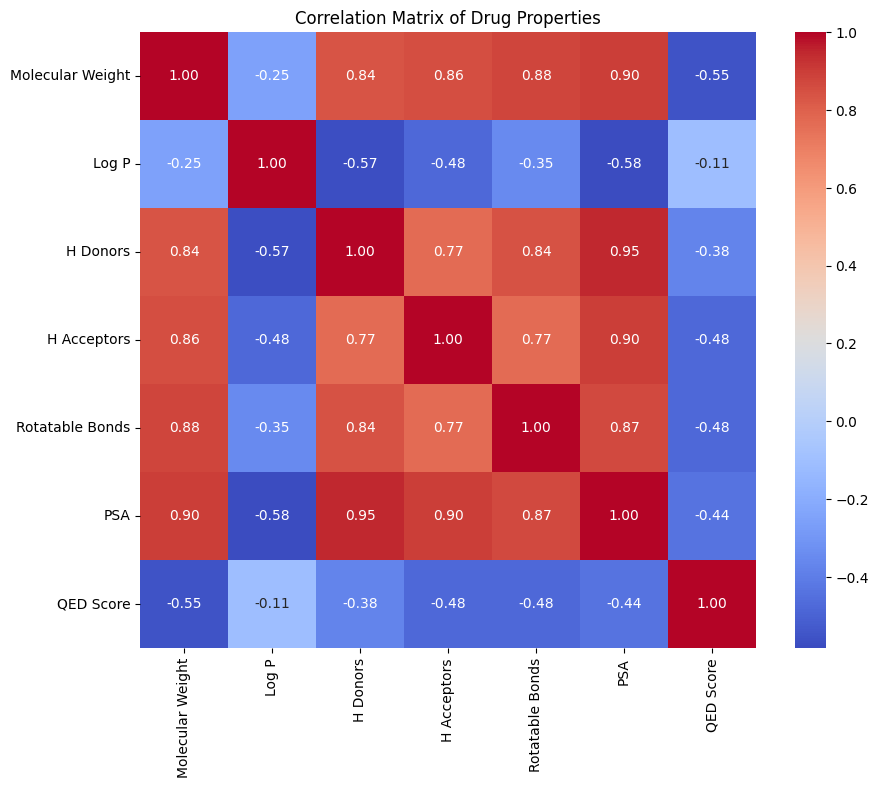

In [ ]:
properties = ['Molecular Weight', 'Log P', 'H Donors', 'H Acceptors', 'Rotatable Bonds', 'PSA', 'QED Score']
correlation_matrix = likable_drugs[properties].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Drug Properties")
plt.show()

The heatmap shows that larger molecules (higher molecular weight) with more rotatable bonds, hydrogen bond donors, and acceptors tend to have lower QED scores, indicating they are less drug-like. QED scores are negatively correlated with molecular weight and polar surface area (PSA), suggesting that smaller, less polar compounds are generally more favorable for drug-likeness. Additionally, lipophilic compounds (higher Log P) tend to have fewer polar groups and less flexibility.

/Users/alexandra/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


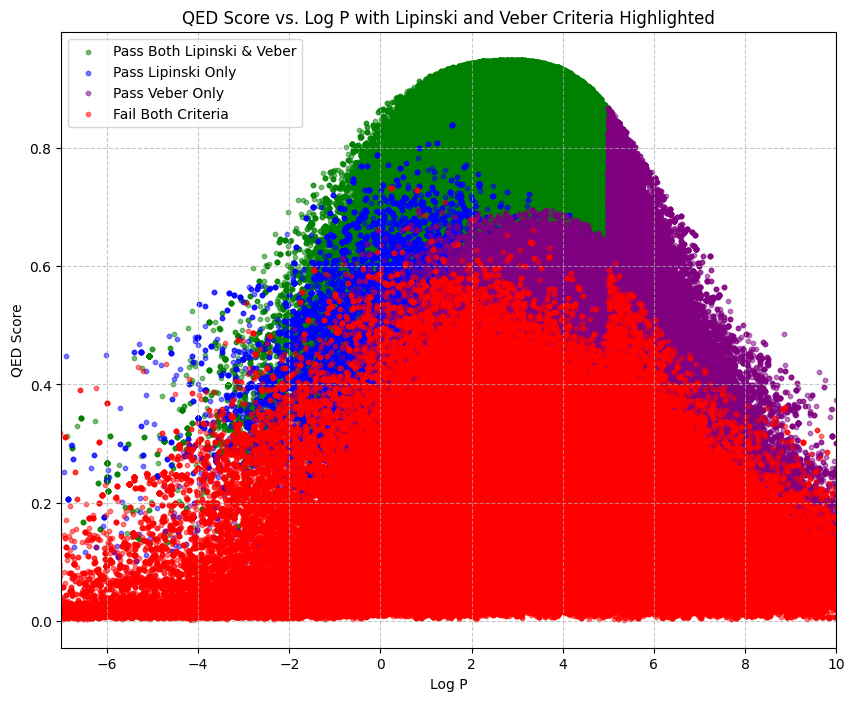

In [ ]:
plt.figure(figsize=(10, 8))
for color in ['green', 'blue', 'purple', 'red']:
    subset = likable_drugs[likable_drugs['Color'] == color]
    label = ''
    if color == 'green':
        label = 'Pass Both Lipinski & Veber'
    elif color == 'blue':
        label = 'Pass Lipinski Only'
    elif color == 'purple':
        label = 'Pass Veber Only'
    elif color == 'red':
        label = 'Fail Both Criteria'
    plt.scatter(subset['Log P'], subset['QED Score'], c=color, label=label, alpha=0.5, s=10)

plt.xlim(-7, 10)

plt.xlabel("Log P")
plt.ylabel("QED Score")
plt.title("QED Score vs. Log P with Lipinski and Veber Criteria Highlighted")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

The plot shows that compounds with moderate Log P values (around 0 to 5) tend to have higher QED scores, indicating a balance between lipophilicity and drug-likeness. Compounds that pass both Lipinski and Veber criteria (green points) are clustered in this favorable range, with QED scores often above 0.6, suggesting they are more drug-like. In contrast, compounds that fail both criteria (red points) generally have lower QED scores and are spread across both high and low Log P values. This suggests that extreme lipophilicity or hydrophilicity is less favorable for drug-likeness.